In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
#data preprocessing

In [5]:
data.shape

(7920, 3)

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [12]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
#text preprocessing

In [14]:
import re
import string

In [15]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [16]:
#uppercase to lower case

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [19]:
#remove links

In [20]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [22]:
#remove punctuation

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [25]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [26]:
#remove numbers

In [31]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [32]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [33]:
#remove stop words

In [34]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 325.1 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 200.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 787.7 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.5 MB 787.7 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 521.8 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 654.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 778.2 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 778.2 kB/s eta 0:00:02
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import nltk

In [36]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [38]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [40]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [41]:
#stemming

In [42]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [44]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [45]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [46]:
#building vocabulary

In [47]:
from collections import Counter
vocab = Counter()

In [48]:
vocab

Counter()

In [49]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [50]:
len(vocab)

15949

In [51]:
data.shape

(7920, 3)

In [52]:
tokens = [key for key in vocab if vocab[key] > 10]

In [53]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [54]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [55]:
#divide data set

In [56]:
X = data['tweet']
y = data['label']

In [58]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
X_train

607     wish shoutout indian malayali fun tbt tb tag p...
6941    thank appl delet everyth calendar updat stupid...
5419    prophet husband iphon android kindl book decem...
2862        use thing io led flash shortcut io appl ui ux
4130    stripey day superdri girl selfi selfi potd pho...
                              ...                        
1191    tea time iphon twelveskip iphonesia appl tech ...
5236    good life pet iphoneographi iphon blackandwhit...
6306    pc exquisit squishi random charm iphon strap t...
808           iphon mid phone date less year sometim appl
3620    samsung galaxi note thank sooo much dad tablet...
Name: tweet, Length: 6336, dtype: object

In [61]:
X_test

521     periwinkl blue wooden bird feeder garden gift ...
2696    chase sunset sunset natur street iphon instada...
1354    rt rafikihbfollow followback ff instagram ipho...
1128    cleo dog home venezuela caraca camera look swe...
4613    laaaaavli weather sun hot warm weather summer ...
                              ...                        
64      geometri iphoneographi iphoneonli iphoneograph...
4791    sign boss secretli hate news photographi fashi...
4176    want new phone dont care iphon anymor anoth ap...
1016    get order hard plastic shaw discount code twit...
5768    kid zip hoodi much zeta suppli click link … ip...
Name: tweet, Length: 1584, dtype: object

In [62]:
y_train

607     0
6941    1
5419    0
2862    1
4130    0
       ..
1191    0
5236    0
6306    0
808     0
3620    0
Name: label, Length: 6336, dtype: int64

In [63]:
#vectorization

In [64]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [65]:
vectorized_x_train = vectorizer(X_train, tokens)

In [66]:
vectorized_x_test = vectorizer(X_test, tokens)

In [67]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_train

607     0
6941    1
5419    0
2862    1
4130    0
       ..
1191    0
5236    0
6306    0
808     0
3620    0
Name: label, Length: 6336, dtype: int64

In [69]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_test

521     0
2696    0
1354    0
1128    0
4613    0
       ..
64      0
4791    0
4176    1
1016    0
5768    0
Name: label, Length: 1584, dtype: int64

In [71]:
y_train.value_counts()

label
0    4726
1    1610
Name: count, dtype: int64

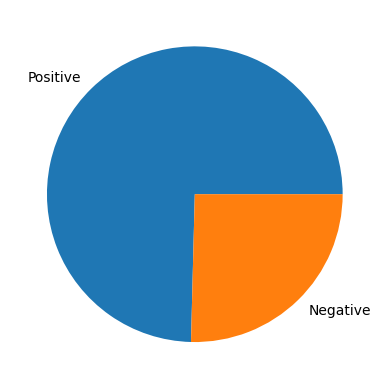

In [72]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [73]:
#handle imbalance data set

In [74]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 165.2 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 187.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 151.3 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 204.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 262.6 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 313.8 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.3 kB 403.5 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 445.2 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 491.5 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9452, 1145) (9452,)


In [76]:
y_train_smote.value_counts()

label
0    4726
1    4726
Name: count, dtype: int64

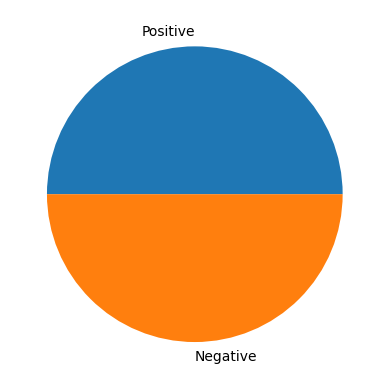

In [77]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [78]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
y_train_smote

0       0
1       1
2       0
3       1
4       0
       ..
9447    1
9448    1
9449    1
9450    1
9451    1
Name: label, Length: 9452, dtype: int64

In [80]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
y_test

521     0
2696    0
1354    0
1128    0
4613    0
       ..
64      0
4791    0
4176    1
1016    0
5768    0
Name: label, Length: 1584, dtype: int64

In [82]:
#model trainning and evaluation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [85]:
#logistic regression

In [86]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.915
	Recall = 0.976
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.857
	Precision = 0.689
	Recall = 0.827
	F1-Score = 0.752


In [87]:
#naive bayes

In [88]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.869
	Recall = 0.96
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.856
	Precision = 0.671
	Recall = 0.887
	F1-Score = 0.764


In [89]:
#decision tree

In [90]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.807
	Precision = 0.635
	Recall = 0.623
	F1-Score = 0.629


In [91]:
#random forest

In [92]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.847
	Precision = 0.72
	Recall = 0.68
	F1-Score = 0.7


In [93]:
#support vector machine

In [94]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.87
	Precision = 0.738
	Recall = 0.784
	F1-Score = 0.76


In [95]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)